# Análisis de la Industria Automotriz

## El objetivo de este análisis es identificar aquellos atributos de un automobil que tienen un impacto directamente relacionado con el precio del automobil

### 1.- Importamos la base de datos

In [25]:
# Importamos las librerías para futuros cálculos
import pandas as pd
import numpy as np

In [26]:
#Importamos la base de datos
path='C:\\Users\\Gabo\\Documents\\Gabriel Mendoza\\Business\\Crehana\\Análisis de datos con jupyther notebook\\Módulos\\## Módulo ## - Car Industry Analysis\\auto.csv'
df=pd.read_csv(path)

In [27]:
# Conocemos el contenido de la base de datos
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### 2.- Análisis individual de los diferentes atributos usando visualizaciones

In [28]:
# Importamos librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [29]:
# Conocemos el tipo de dato para cada atributo
print(df.dtypes)

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


#### Para analizar gráfricamente variables continuas (numéricas) utilizaremos scatter plots (gráficos de dispersión) para entender la relación de las variables con respecto al precio

(0.0, 53168.96614569299)

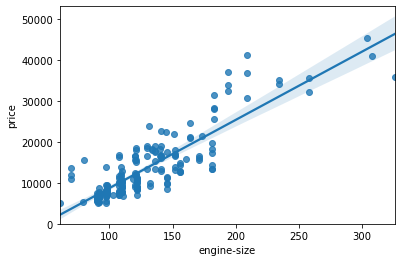

In [30]:
# Engine size como pontencial predicor del precio
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

Cuando el tamaño del motor aumenta, también el precio aumenta: esto indica una correlación positiva directa entre ambas variables. El tamaño del motor puede ser un buen predictor del precio si quisieramos hacer una regresión lineal.

In [31]:
# Analizamos la misma variable pero con el coeficiente de correlación
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

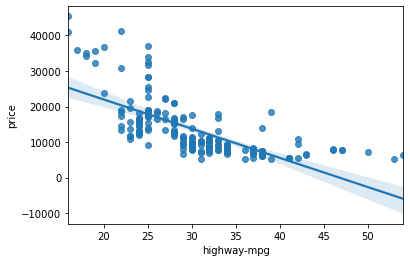

In [32]:
# Realizamos el mismo ejercicio de visualización para highway-mpg millas por galón en carretera
sns.regplot(x="highway-mpg", y="price", data=df)

In [33]:
# Analizamos la correlación entre las variables
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


Las millas por galón suben, el precio cae. Esto indica una relación inversa entre ambas variables. Por lo que puede también ser un buen predictor del precio de un auto

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

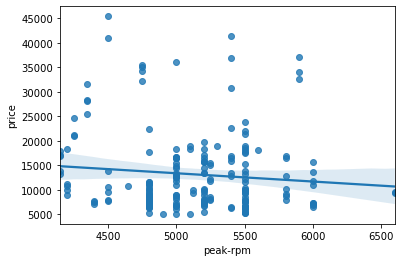

In [34]:
# Analizamos la varuable peak-rpm (revoluciones por minuto)
sns.regplot(x="peak-rpm", y="price", data=df)

In [35]:
# Analizamos la correlación
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Observamos que la relación entre las revoluciones por minuto y el precio no tienen relación por lo que no nos serviría como una variable que impacta en el precio

#### Para analizar gráfricamente variables categóricas utilizaremos Boxplots para entender la relación de las variables con respecto al precio

<AxesSubplot:xlabel='body-style', ylabel='price'>

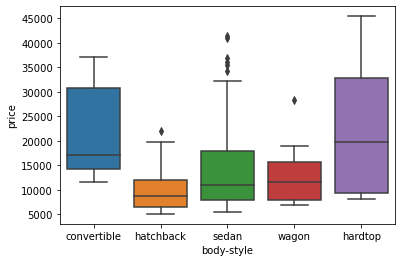

In [36]:
# Generamos el boxplot para el tipo de auto vs el precio
sns.boxplot(x="body-style", y="price", data=df)

Vemos que las distribuciones entre el precio y los diferentes tipos de auto tienen un overlap, por lo que quiere decir que el precio es básicamente el mismo para cualquier tipo de auto. Por lo tanto no sería una variable que nos ayude a generar una predicción con respecto al precio

<AxesSubplot:xlabel='engine-location', ylabel='price'>

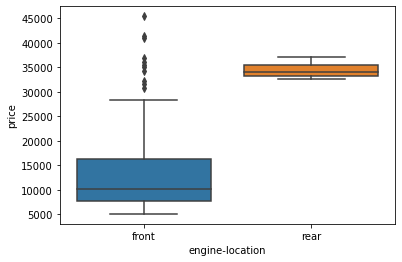

In [37]:
# Generamos el box plot con el posicionamiento del motor
sns.boxplot(x="engine-location", y="price", data=df)

Vemos que la distribución del posicionamiento del motor vs el precio es muy diferente por cada tipo de posicionamiento, por lo que nos indica que el precio SI cambia cuando esta variable cambia. Es un buen predictor, es decir, un buen atributo para conocer el comportamiento del precio de un auto

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

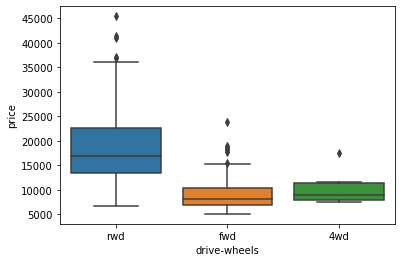

In [38]:
# Boxplot para drive-wheel. Es decir, la tracción del coche
sns.boxplot(x="drive-wheels", y="price", data=df)

Nuevamente notamos que la distribución es diferente para cada tipo de tracción por lo que puede ser un buen predictor del precio

### 3.- Análisis Estadístico Descriptivo

In [39]:
#Generamos estadísticas descriptivas para cada atributo de nuestra base de datos
df.describe(include='all')

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.000000,201.00000,201,201,201,201,201,201,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,NaN,22,2,2,5,3,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,NaN,32,165,115,94,118,198,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,100.000000,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,58.167861,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,0.000000,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,50.000000,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,100.000000,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,150.000000,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


<p><b>Correlacion</b>: medida del grado de interdependencia entre variables.</p>

<p><b>Causalidad</b>: la relación causa-efecto entre dos variables.</p>


Es importante conocer la diferencia entre ambas ya que correlación no implica causalidad

<p><b>Correlación de Pearson</b></p>
<p>La correlación de Pearson mide la dependencia lineal entre dos variables X y Y.</p>
<p>El coeficiente resultante es un valor entre -1 y 1, donde:</p>
<ul>
    <li><b>1</b>: Correlación lineal positiva perfecta.</li>
    <li><b>0</b>: No correlación lineal, las dos variables no tienen dependencia entre ellas.</li>
    <li><b>-1</b>: Correlación lineal negativa.</li>
</ul>

<b>P-value</b>

<p>Qué es P-value? El P-value es la probabilidad de que la corrlación entre dos variables sean estadísticamente significativas. Normalmente elegimos con nivel de significancia el 5%, lo que quiere decir que estamos 95% seguros de que la correlación entre ambas variables es significativa.</p>


<ul>
    <li>p-value es $<$ 0.001: decimos que existe una fuerte evidencia estadística sobre la correlación de ambas variables.</li>
    <li>el p-value es $<$ 0.05: existe evidencia moderada de que la correlación es estadísticamente significtiva.</li>
    <li>el p-value es $<$ 0.1: existe pobre evidencia de que la correlación es significativa.</li>
    <li>el p-value es $>$ 0.1: no hay evidencia de que la correlación sea significativa.</li>
</ul>

In [40]:
# Importamos nuestras librerías estadísticas para futuros cálculos
from scipy import stats

In [41]:
#Obtenemos la correlación y p-valor de la correlación entre ambas variables
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("La correlación de pearson es", pearson_coef, " con un P-Valor de P =", p_value)  

La correlación de pearson es 0.584641822265508  con un P-Valor de P = 8.076488270733218e-20


<h4>Conclusión:</h4>
<p>Dado que el p-value is $<$ 0.001, la correlación entre wheel-base y el precio es estadísticamente significativa, sin embargo, la relación lineal no es una relación fuerte (~0.585).</p>

In [42]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("La correlación de pearson es", pearson_coef, " con un P-Valor de P = ", p_value)  

La correlación de pearson es 0.8095745670036559  con un P-Valor de P =  6.369057428260101e-48


<h4>Conclusión:</h4>

<p>Dado que el p-value is $<$ 0.001, la correlación entre horsepower y el precio es estadísticamente significativa. Esta correlación es fuerte (~0.809, cercana a 1).</p>

In [43]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("La correlación de pearson es", pearson_coef, " con un P-Valor de P = ", p_value)  

La correlación de pearson es 0.6906283804483638  con un P-Valor de P =  8.016477466159556e-30


<h4>Conclusión:</h4>
<p>Dado que el p-value is $<$ 0.001, la correlación entre length y el precio son estadísticamente significativas, y la relación lineal es medianamente fuerte (~0.691).</p>

In [44]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("La correlación de pearson es", pearson_coef, " con un P-Valor de P =", p_value ) 

La correlación de pearson es 0.7512653440522673  con un P-Valor de P = 9.200335510481646e-38


#### Conclusion:

Dado que el p-value es < 0.001, la correlación entre width y el precio es estadísticamente significativa y la relación lineal es fuerte (\~0.751)

In [45]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "La correlación de pearson es", pearson_coef, " con un P-Valor de P = ", p_value)

La correlación de pearson es 0.8344145257702843  con un P-Valor de P =  2.189577238894065e-53


<h4>Conclusión:</h4>
<p>Dado que el p-value es $<$ 0.001, la correlación entre curb-weight y el precio es estadísticamente significativs, y la relación lineal es fuerte (~0.834).</p>

In [46]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("La correlación de pearson es", pearson_coef, "con un P-Valor de P =", p_value) 

La correlación de pearson es 0.8723351674455185 con un P-Valor de P = 9.265491622198389e-64


<h4>Conclusión:</h4>

<p>Dado que el p-value es $<$ 0.001, la correlación entre el tamaño del motor y el precio es estadísticamente significativa, y la relación lineal es muy fuerte(~0.872).</p>

In [47]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("La correlación de pearson es", pearson_coef, " con un P-Valor de P =  ", p_value ) 

La correlación de pearson es 0.5431553832626602  con un P-Valor de P =   8.049189483935489e-17


<h4>Conclusión:</h4>
<p>Dado que el p-value es $<$ 0.001, la correlación entre bore y precio es estadísticamente significativa, pero la relación lineal es moderada (~0.521).</p>

In [48]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("La correlación de pearson es", pearson_coef, " con un P-Valor de P = ", p_value)

La correlación de pearson es -0.6865710067844678  con un P-Valor de P =  2.321132065567641e-29


<h4>Conclusión:</h4>
<p>Dado que el p-value es $<$ 0.001, la correlación entre city-mpg y el precio es estadísticamente significativa, y el coeficiente de -0.687 muestra que la relación es negativa y moderadamente fuerte.</p>

In [49]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "La correlación de pearson es", pearson_coef, " con un P-Valor de P = ", p_value ) 

La correlación de pearson es -0.704692265058953  con un P-Valor de P =  1.7495471144476358e-31


#### Conclusion:

Dado que el p-value es < 0.001, la correlación entre highway-mpg y el precio es estadísticamente significativa, y el coeficiente es -0.705 muestra una relación negativa moderadamente fuerte
